# 1. Import Libraries

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

#For cleaner plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# 2. Load Dataset

In [7]:
df = pd.read_csv("../data/log_updated.csv")
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (167880, 23)


,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,session_day,session_month
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,False,False,False,False,0,0,True,16,15-07-2018,True,editorial_playlist,trackdone,trackdone,Sunday,July
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,False,True,False,False,0,0,True,16,15-07-2018,True,editorial_playlist,trackdone,trackdone,Sunday,July
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,False,True,False,False,0,0,True,16,15-07-2018,True,editorial_playlist,trackdone,trackdone,Sunday,July
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,False,True,False,False,0,0,True,16,15-07-2018,True,editorial_playlist,trackdone,trackdone,Sunday,July
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,False,True,False,False,0,0,True,16,15-07-2018,True,editorial_playlist,trackdone,trackdone,Sunday,July


# 3. Data Overview

In [12]:
print(df.info())
print(df.describe(include='all'))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167880 entries, 0 to 167879
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   session_id                       167880 non-null  object
 1   session_position                 167880 non-null  int64 
 2   session_length                   167880 non-null  int64 
 3   track_id_clean                   167880 non-null  object
 4   skip_1                           167880 non-null  bool  
 5   skip_2                           167880 non-null  bool  
 6   skip_3                           167880 non-null  bool  
 7   not_skipped                      167880 non-null  bool  
 8   context_switch                   167880 non-null  bool  
 9   no_pause_before_play             167880 non-null  bool  
 10  short_pause_before_play          167880 non-null  bool  
 11  long_pause_before_play           167880 non-null  bool  
 12  hist_user_behavi

In [13]:
# Checking for missing values
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
session_day                        0
session_month                      0
dtype: int64


In [14]:
#Drop duplicates if any
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

Shape after dropping duplicates: (167880, 23)


# 4. Target Variable Distribution (Skip_2)

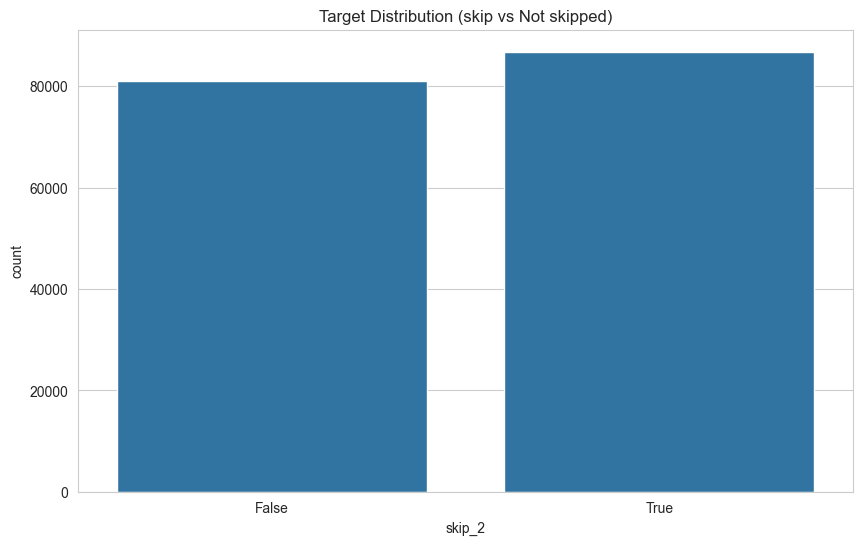

skip_2
True     0.517179
False    0.482821
Name: proportion, dtype: float64


In [18]:
sns.countplot(x='skip_2', data=df)
plt.title("Target Distribution (skip vs Not skipped)")
plt.show()
print(df["skip_2"].value_counts(normalize=True))


# 5. Categorical Features Analysis

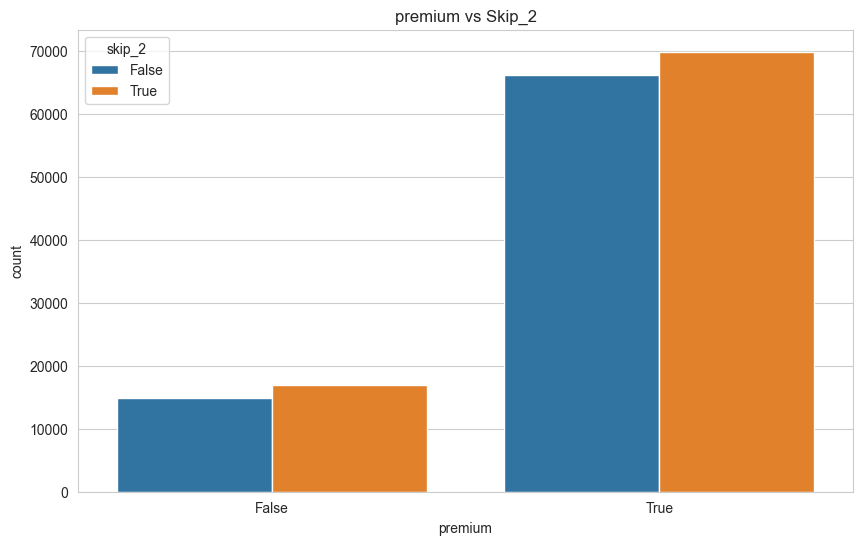

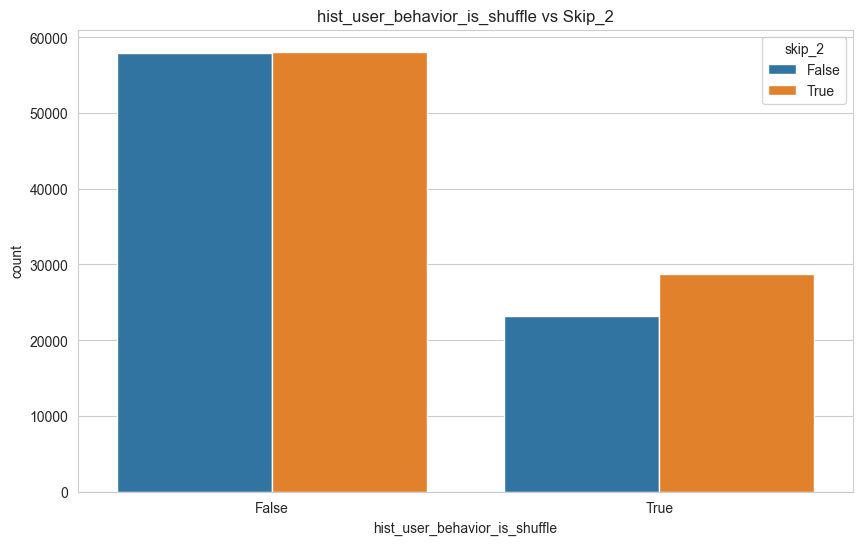

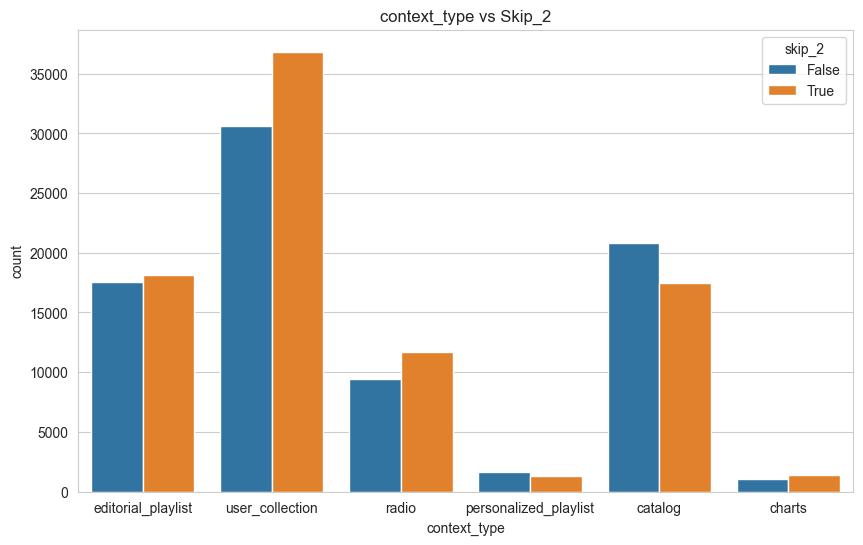

In [19]:
cat_cols = ["premium", "hist_user_behavior_is_shuffle", "context_type"]

for col in cat_cols:
    sns.countplot(x=col, hue="skip_2", data=df)
    plt.title(f"{col} vs Skip_2")
    plt.show()

# 6. Numerical Features Analysis

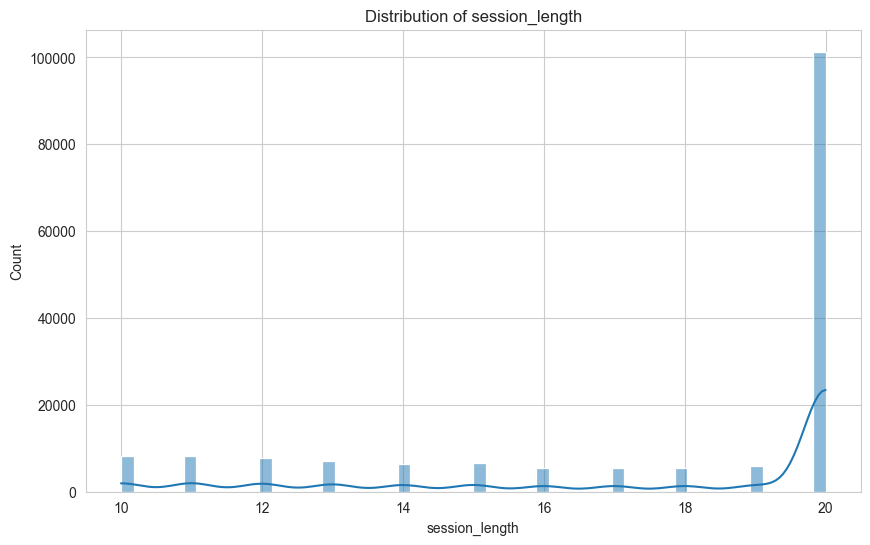

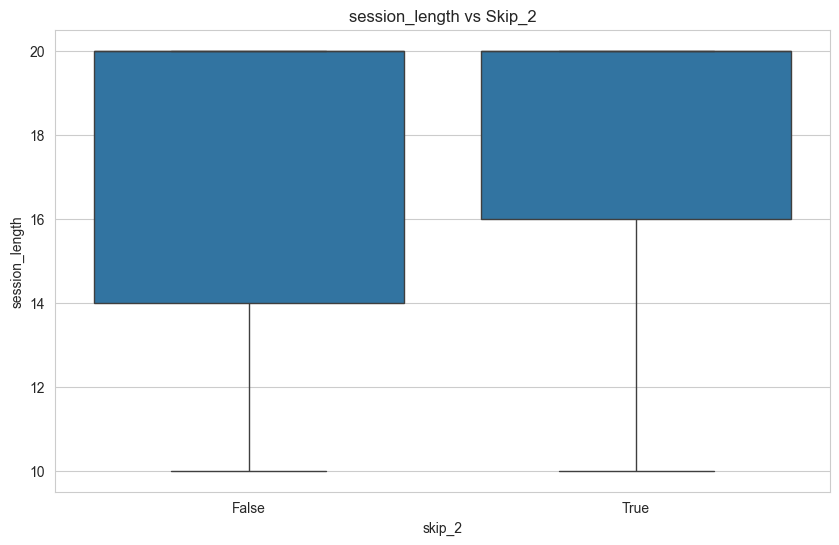

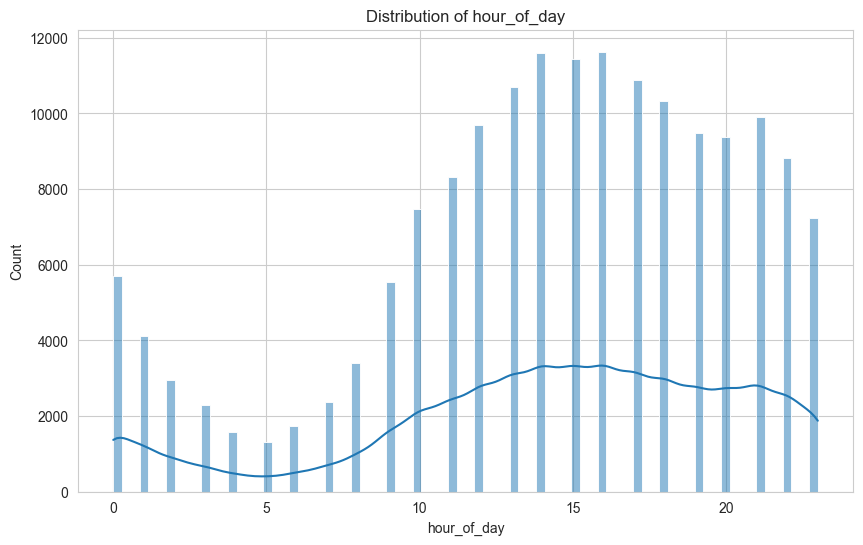

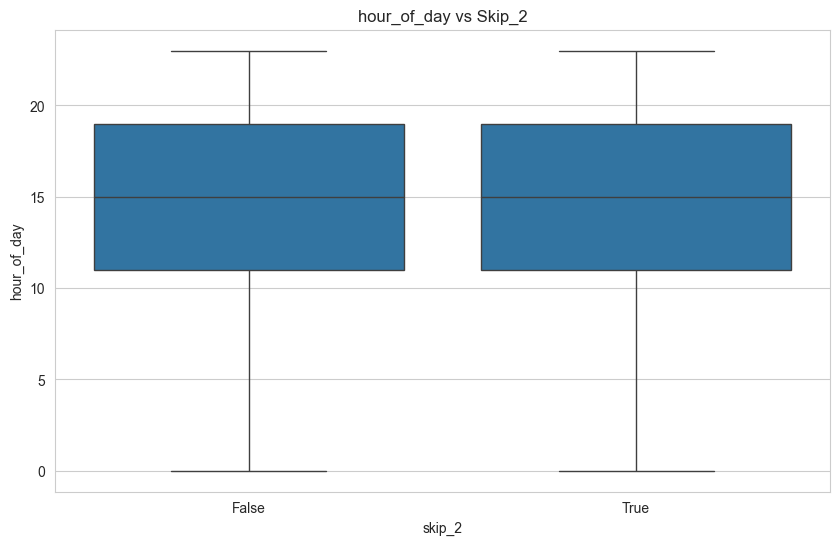

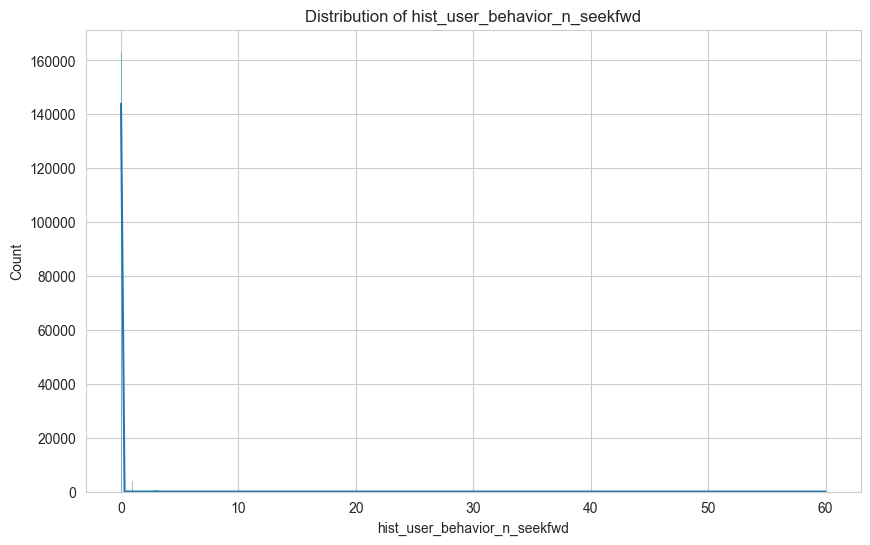

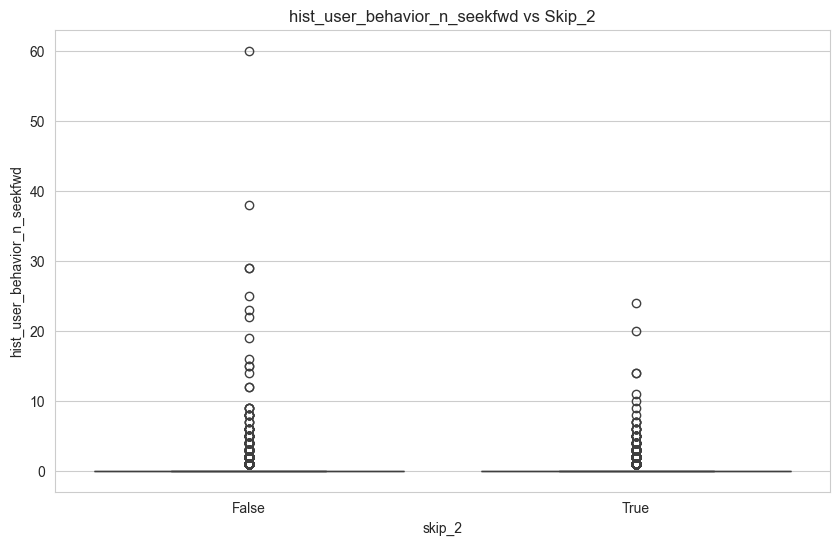

In [21]:
num_cols = ["session_length", "hour_of_day", "hist_user_behavior_n_seekfwd"]

for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    sns.boxplot(x="skip_2", y=col, data=df)
    plt.title(f"{col} vs Skip_2")
    plt.show()

# 7.Correlation Heatmap

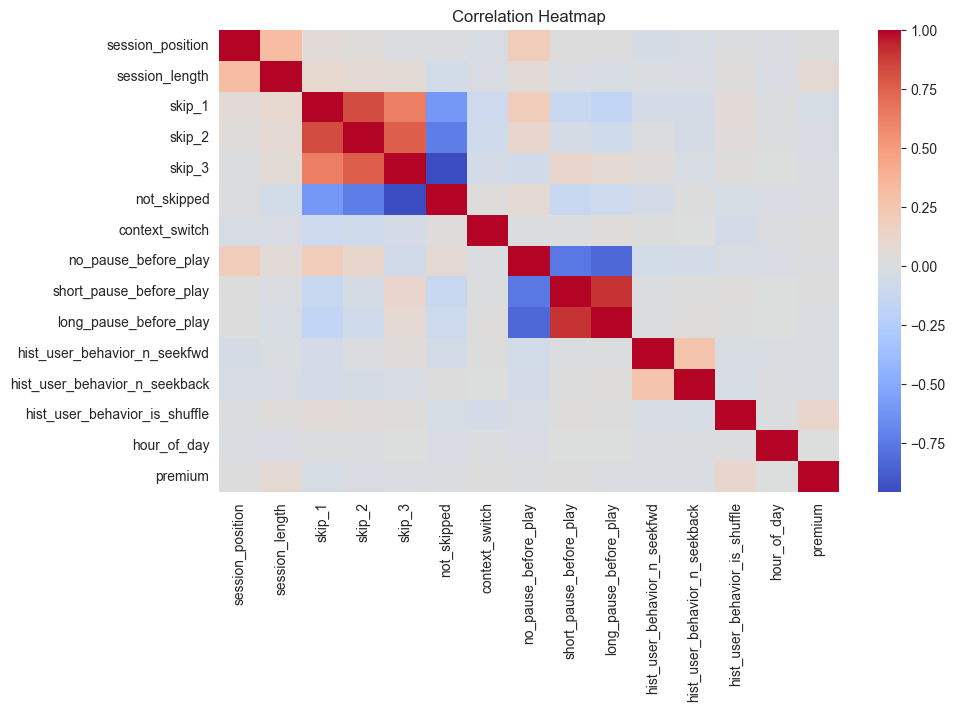

In [23]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 8. Key Insights

# ✅ Premium users tend to skip fewer songs.
# ✅ Shuffle mode increases skipping probability.
# ✅ Longer sessions → higher skip rate.
# ✅ Context (like playlists) strongly affects skipping behavior.